In [46]:
import vaex
import pandas as pd
import geopandas as gpd
import os
import numpy as np
import scipy

In [47]:
df_iptu = vaex.open("../data/IPTU-1995-2023-agrupados-por-od.hdf5").to_pandas_df()
gdf_zonas_od = gpd.read_file("../passo0/zonas_od_sp_corrected.gpkg")

In [48]:
df_iptu.shape

(9766, 48)

In [49]:
df_iptu.head()

,od,ano,Quantidade de Unidades,Quantidade de Unidades Condominiais,Tamanho Médio da Unidade Condominial,Tamanho médio dos Terrenos,Área Total dos lotes,Área Total Ocupada,Área Total Construída,Valor Total dos Terrenos,...,Residencial horizontal Médio (qt),Residencial horizontal Alto (qt),Comercial vertical Baixo (qt),Comercial vertical Médio (qt),Comercial vertical Alto (qt),Comercial horizontal Baixo (qt),Comercial horizontal Alto (qt),Comercial horizontal Médio (qt),Terreno (qt),Outros Usos (qt)
0,0,1995,11225,1923,91.491420,3635.021203,13871588.5,1007835.0,1516133,4.051056e+08,...,1580,206,25,1,2,268,105,34,3682,1
1,0,1996,11520,2100,93.539048,3880.753299,14145108.5,1104838.0,1622752,6.278374e+08,...,1740,212,24,1,2,297,104,37,3512,1
2,0,1997,10659,2100,93.540000,4151.996060,13694956.5,1190967.0,1773138,6.705530e+08,...,1804,218,24,3,3,314,105,41,2502,1
3,0,1998,10644,2117,95.931034,3965.917418,11631642.5,1201894.0,1797462,6.082496e+08,...,1837,220,25,3,3,306,104,40,2452,1
4,0,1999,10716,2252,95.603020,4078.097798,11583077.5,1233579.0,1856695,6.123504e+08,...,1864,220,29,4,3,315,104,39,2361,1


In [50]:
df_iptu.columns

Index(['od', 'ano', 'Quantidade de Unidades',
       'Quantidade de Unidades Condominiais',
       'Tamanho Médio da Unidade Condominial', 'Tamanho médio dos Terrenos',
       'Área Total dos lotes', 'Área Total Ocupada', 'Área Total Construída',
       'Valor Total dos Terrenos', 'Valor Total das Construções', 'CA médio',
       'TO médio', 'CA médio em lotes condominiais',
       'TO médio em lotes condominiais', 'CA médio em lotes não condominiais',
       'TO médio em lotes não condominiais', 'Comprimento Médio da Testada',
       'Número médio de Pavimentos', 'Fator de obsolecência médio',
       'Residencial vertical Baixo (m2)', 'Residencial vertical Médio (m2)',
       'Residencial vertical Alto (m2)', 'Residencial horizontal Baixo (m2)',
       'Residencial horizontal Médio (m2)', 'Residencial horizontal Alto (m2)',
       'Comercial vertical Baixo (m2)', 'Comercial vertical Médio (m2)',
       'Comercial vertical Alto (m2)', 'Comercial horizontal Baixo (m2)',
       'Comercia

In [51]:
selected_columns = [
    "od",
    "ano",
    # "Quantidade de Unidades",
    # "Quantidade de Unidades Condominiais",
    # "Tamanho Médio da Unidade Condominial",
    # "Tamanho médio dos Terrenos",
    # "Área Total dos lotes",
    # "Área Total Ocupada",
    "Área Total Construída",
    "Valor Total dos Terrenos",
    # "Valor Total das Construções",
    # "CA médio",
    # "TO médio",
    # "CA médio em lotes condominiais",
    # "TO médio em lotes condominiais",
    # "CA médio em lotes não condominiais",
    # "TO médio em lotes não condominiais",
    # "Comprimento Médio da Testada",
    "Número médio de Pavimentos",
    # "Fator de obsolecência médio",
    # "Residencial vertical Baixo (m2)",
    # "Residencial vertical Médio (m2)",
    # "Residencial vertical Alto (m2)",
    # "Residencial horizontal Baixo (m2)",
    # "Residencial horizontal Médio (m2)",
    # "Residencial horizontal Alto (m2)",
    # "Comercial vertical Baixo (m2)",
    # "Comercial vertical Médio (m2)",
    # "Comercial vertical Alto (m2)",
    # "Comercial horizontal Baixo (m2)",
    # "Comercial horizontal Alto (m2)",
    # "Comercial horizontal Médio (m2)",
    # "Terreno (m2)",
    # "Outros Usos (m2)",
    # "Residencial vertical Baixo (qt)",
    # "Residencial vertical Médio (qt)",
    # "Residencial vertical Alto (qt)",
    # "Residencial horizontal Baixo (qt)",
    # "Residencial horizontal Médio (qt)",
    # "Residencial horizontal Alto (qt)",
    # "Comercial vertical Baixo (qt)",
    # "Comercial vertical Médio (qt)",
    # "Comercial vertical Alto (qt)",
    # "Comercial horizontal Baixo (qt)",
    # "Comercial horizontal Alto (qt)",
    # "Comercial horizontal Médio (qt)",
    # "Terreno (qt)",
    # "Outros Usos (qt)",
]
selected_columns

# filter the df_iptu
df_iptu = df_iptu[selected_columns]
df_iptu

,od,ano,Área Total Construída,Valor Total dos Terrenos,Número médio de Pavimentos
0,0,1995,1516133,4.051056e+08,1.650690
1,0,1996,1622752,6.278374e+08,1.730208
2,0,1997,1773138,6.705530e+08,1.910780
3,0,1998,1797462,6.082496e+08,1.934141
4,0,1999,1856695,6.123504e+08,1.953247
...,...,...,...,...,...
9761,342,2019,2148026,2.475258e+09,7.997072
9762,342,2020,2194230,2.548223e+09,8.036418
9763,342,2021,2189986,2.490865e+09,8.128660
9764,342,2022,2223536,3.869815e+09,8.079822


In [52]:
# vamos pegar a área de cada od a partir do gdf_zonas_od
for index, row in df_iptu.iterrows():
    numero_od = str(int(row["od"]))
    area_m2 = gdf_zonas_od[gdf_zonas_od["od_id"] == numero_od]["area"]
    try:
        df_iptu.loc[index, "area_m2"] = area_m2.values[0]
    except:
        print(f"Unable to find od_id: {numero_od}")

Unable to find od_id: 0
Unable to find od_id: 0
Unable to find od_id: 0
Unable to find od_id: 0
Unable to find od_id: 0
Unable to find od_id: 0
Unable to find od_id: 0
Unable to find od_id: 0
Unable to find od_id: 0
Unable to find od_id: 0
Unable to find od_id: 0
Unable to find od_id: 0
Unable to find od_id: 0
Unable to find od_id: 0
Unable to find od_id: 0
Unable to find od_id: 0
Unable to find od_id: 0
Unable to find od_id: 0
Unable to find od_id: 0
Unable to find od_id: 0
Unable to find od_id: 0
Unable to find od_id: 0
Unable to find od_id: 0
Unable to find od_id: 0
Unable to find od_id: 0
Unable to find od_id: 0
Unable to find od_id: 0
Unable to find od_id: 0
Unable to find od_id: 0


In [53]:
df_iptu

,od,ano,Área Total Construída,Valor Total dos Terrenos,Número médio de Pavimentos,area_m2
0,0,1995,1516133,4.051056e+08,1.650690,NaN
1,0,1996,1622752,6.278374e+08,1.730208,NaN
2,0,1997,1773138,6.705530e+08,1.910780,NaN
3,0,1998,1797462,6.082496e+08,1.934141,NaN
4,0,1999,1856695,6.123504e+08,1.953247,NaN
...,...,...,...,...,...,...
9761,342,2019,2148026,2.475258e+09,7.997072,3.192316e+06
9762,342,2020,2194230,2.548223e+09,8.036418,3.192316e+06
9763,342,2021,2189986,2.490865e+09,8.128660,3.192316e+06
9764,342,2022,2223536,3.869815e+09,8.079822,3.192316e+06


In [54]:
# df_iptu.loc[:, "valor_m2"] = df_iptu["Valor Total dos Terrenos"] / df_iptu["Área Total Construída"]
df_iptu.loc[:, "valor_m2"] = df_iptu["Valor Total dos Terrenos"] / df_iptu["area_m2"]
df_iptu

# TODO: DONE! trocar isso pela área total da zona, isso vai dar uma amplificada geral nas coisas

,od,ano,Área Total Construída,Valor Total dos Terrenos,Número médio de Pavimentos,area_m2,valor_m2
0,0,1995,1516133,4.051056e+08,1.650690,NaN,NaN
1,0,1996,1622752,6.278374e+08,1.730208,NaN,NaN
2,0,1997,1773138,6.705530e+08,1.910780,NaN,NaN
3,0,1998,1797462,6.082496e+08,1.934141,NaN,NaN
4,0,1999,1856695,6.123504e+08,1.953247,NaN,NaN
...,...,...,...,...,...,...,...
9761,342,2019,2148026,2.475258e+09,7.997072,3.192316e+06,775.380003
9762,342,2020,2194230,2.548223e+09,8.036418,3.192316e+06,798.236567
9763,342,2021,2189986,2.490865e+09,8.128660,3.192316e+06,780.269023
9764,342,2022,2223536,3.869815e+09,8.079822,3.192316e+06,1212.228023


In [55]:
# importar o indice de inflação IPCA, que está em um csv
inflacao_anual = pd.read_csv("../ipca/inflacao_acumulada_anual.csv")

# filter to see only 'Ano' higher than 1994
inflacao_anual = inflacao_anual[inflacao_anual["Ano"] >= 1995]

# corrigir os valores de 'valor_m2' no df_iptu com base na coluna 'ano'
for index, row in df_iptu.iterrows():
    ano = row["ano"]
    valor = row["valor_m2"]
    inflacao = inflacao_anual[inflacao_anual["Ano"] == ano]["ipca_ate_2023"].values[0]
    # print(ano, inflacao)
    valor_corrigido = valor * (1 + inflacao)
    df_iptu.at[index, "valor_m2_vpl"] = valor_corrigido

df_iptu

,od,ano,Área Total Construída,Valor Total dos Terrenos,Número médio de Pavimentos,area_m2,valor_m2,valor_m2_vpl
0,0,1995,1516133,4.051056e+08,1.650690,NaN,NaN,NaN
1,0,1996,1622752,6.278374e+08,1.730208,NaN,NaN,NaN
2,0,1997,1773138,6.705530e+08,1.910780,NaN,NaN,NaN
3,0,1998,1797462,6.082496e+08,1.934141,NaN,NaN,NaN
4,0,1999,1856695,6.123504e+08,1.953247,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
9761,342,2019,2148026,2.475258e+09,7.997072,3.192316e+06,775.380003,1021.097926
9762,342,2020,2194230,2.548223e+09,8.036418,3.192316e+06,798.236567,1007.773666
9763,342,2021,2189986,2.490865e+09,8.128660,3.192316e+06,780.269023,942.486952
9764,342,2022,2223536,3.869815e+09,8.079822,3.192316e+06,1212.228023,1330.420255


In [56]:
# filtrar para ver somente a od==0
df_iptu[df_iptu["od"] == 5]

,od,ano,Área Total Construída,Valor Total dos Terrenos,Número médio de Pavimentos,area_m2,valor_m2,valor_m2_vpl
145,5,1995,2844816,2.391085e+08,17.911596,747752.070801,319.769811,2112.974955
146,5,1996,2843196,2.947026e+08,17.909109,747752.070801,394.118014,2127.488453
147,5,1997,2868793,3.237836e+08,17.892676,747752.070801,433.009358,2133.437109
148,5,1998,2870802,3.407930e+08,17.876330,747752.070801,455.756715,2134.126393
149,5,1999,2873746,3.469493e+08,17.869678,747752.070801,463.989693,2137.182924
150,5,2000,2869777,3.463677e+08,17.881959,747752.070801,463.212016,1958.553046
151,5,2001,2892609,3.677385e+08,17.849367,747752.070801,491.792021,1962.250163
152,5,2002,2894051,4.217279e+08,17.806939,747752.070801,563.994314,2089.993728
153,5,2003,2895621,4.510778e+08,17.807025,747752.070801,603.245120,1986.546504
154,5,2004,2890867,4.854089e+08,17.797525,747752.070801,649.157487,1955.846591


## carrega as distancias


In [57]:
dist = pd.read_csv("../calcula_distancias/distancias_metro.csv")
dist.head()

,od_id,od_nome,od_area,od_ano,od_municip,area,perimeter,geometry,d_m_1995,d_m_1996,...,d_m_2010,d_m_2011,d_m_2012,d_m_2013,d_m_2014,d_m_2015,d_m_2016,d_m_2017,d_m_2018,d_m_2019
0,299,Marsilac,20795.96,2017,36,2.065801e+08,85136.237247,POINT (326174.9658765211 7351918.495185227),36758.906157,36758.906157,...,32762.826694,32762.826694,32762.826694,32762.826694,32762.826694,32349.981352,32349.981352,32349.981352,32066.170070,32066.170070
1,298,Parelheiros,11667.08,2017,36,1.162168e+08,65807.603011,POINT (326540.780140683 7361756.147632605),27058.485950,27058.485950,...,23097.452823,23097.452823,23097.452823,23097.452823,23097.452823,22670.640361,22670.640361,22670.640361,22356.001581,22356.001581
2,295,Belmira Marin,1236.83,2017,36,1.233965e+07,17614.653983,POINT (328928.87749747356 7370240.793577932),18254.530261,18254.530261,...,15157.107965,15157.107965,15157.107965,15157.107965,15157.107965,14789.781409,14789.781409,14789.781409,14514.709237,14514.709237
3,292,Vila Natal,415.09,2017,36,4.141389e+06,10416.324300,POINT (326395.1737669587 7371072.903865544),18192.096492,18192.096492,...,14158.400167,14158.400167,14158.400167,14158.400167,14158.400167,13684.546071,13684.546071,13684.546071,13270.525891,13270.525891
4,291,Jardim Presidente,762.54,2017,36,7.607921e+06,19117.257684,POINT (325479.967254408 7372896.559884261),16890.759485,16890.759485,...,12483.496842,12483.496842,12483.496842,12483.496842,12483.496842,11957.774788,11957.774788,11957.774788,11443.203619,11443.203619


## faz um super merge agora


In [58]:
# Ensure 'od' and 'ano' in df_iptu are of the correct data type, matching those in 'dist'
df_iptu["od"] = df_iptu["od"].astype(int)
df_iptu["ano"] = df_iptu["ano"].astype(int)

# Create a new column for distances
df_iptu["dist_metro"] = np.nan
df_iptu

,od,ano,Área Total Construída,Valor Total dos Terrenos,Número médio de Pavimentos,area_m2,valor_m2,valor_m2_vpl,dist_metro
0,0,1995,1516133,4.051056e+08,1.650690,NaN,NaN,NaN,NaN
1,0,1996,1622752,6.278374e+08,1.730208,NaN,NaN,NaN,NaN
2,0,1997,1773138,6.705530e+08,1.910780,NaN,NaN,NaN,NaN
3,0,1998,1797462,6.082496e+08,1.934141,NaN,NaN,NaN,NaN
4,0,1999,1856695,6.123504e+08,1.953247,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9761,342,2019,2148026,2.475258e+09,7.997072,3.192316e+06,775.380003,1021.097926,NaN
9762,342,2020,2194230,2.548223e+09,8.036418,3.192316e+06,798.236567,1007.773666,NaN
9763,342,2021,2189986,2.490865e+09,8.128660,3.192316e+06,780.269023,942.486952,NaN
9764,342,2022,2223536,3.869815e+09,8.079822,3.192316e+06,1212.228023,1330.420255,NaN


In [59]:
# Iterate over the unique years in df_iptu
for ano in df_iptu["ano"].unique():
    year_column = f"d_m_{ano}"
    if year_column in dist.columns:
        # iterar sobre od
        for od in list(df_iptu["od"].unique()):
            # pegar a distancia correspondente ao od e ano
            try:
                value = dist.loc[(dist["od_id"] == od), year_column].values[0]
                df_iptu.loc[
                    (df_iptu["od"] == od) & (df_iptu["ano"] == ano), "dist_metro"
                ] = value
            except:
                pass

    else:
        print(f"Column {year_column} does not exist in 'dist' DataFrame.")

Column d_m_2020 does not exist in 'dist' DataFrame.
Column d_m_2021 does not exist in 'dist' DataFrame.
Column d_m_2022 does not exist in 'dist' DataFrame.
Column d_m_2023 does not exist in 'dist' DataFrame.


In [60]:
df_iptu.columns

Index(['od', 'ano', 'Área Total Construída', 'Valor Total dos Terrenos',
       'Número médio de Pavimentos', 'area_m2', 'valor_m2', 'valor_m2_vpl',
       'dist_metro'],
      dtype='object')

In [61]:
select_cols = ["od", "ano", "valor_m2_vpl", "dist_metro"]
final = df_iptu[select_cols]

# remove any row that contain a nan
final = final.dropna()
final

# remove any raw where the dist_metro is higher than 5000 (from 8393 rows to 5582)
# final = final[final['dist_metro'] <= 5000]
# final

,od,ano,valor_m2_vpl,dist_metro
29,1,1995,2038.420646,791.836068
30,1,1996,2092.362073,791.836068
31,1,1997,2101.782314,791.836068
32,1,1998,2106.662125,791.836068
33,1,1999,2105.847268,791.836068
...,...,...,...,...
9757,342,2015,1046.565815,5945.762134
9758,342,2016,1030.352381,5945.762134
9759,342,2017,1024.381486,5945.762134
9760,342,2018,1024.829395,5872.288516


In [62]:
# create a 3D plo using ploty
# the dimensions are: 'dist_metro', 'ano', 'Valor Total dos Terrenos'
import plotly.express as px

# Create the 3D plot
fig = px.scatter_3d(final, x="dist_metro", y="ano", z="valor_m2_vpl")

# Save the figure to an HTML file
fig.write_html("plot.html")

# Open the HTML file in your default web browser
import webbrowser

webbrowser.open("plot.html")

True

In [63]:
import numpy as np
import plotly.graph_objects as go
from scipy.interpolate import griddata
import webbrowser

# Assuming 'final' is your DataFrame and it has the required columns
x = final["dist_metro"]
y = final["ano"].astype(float)  # Ensure that 'ano' is treated as a numeric value
z = final["valor_m2_vpl"]

# Ensure there are no zero or negative values in z
z = z.clip(lower=1e-2)  # Replace 0 and negative values with a small positive number

# Apply a logarithmic transformation to z
z_log = np.log(z)

# Generate a grid of points where the surface will be evaluated
xi = np.linspace(min(x), max(x), 100)
yi = np.linspace(min(y), max(y), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate unstructured D-dimensional data
zi_log = griddata((x, y), z_log, (xi, yi), method="linear")

# Apply the exponential function to get back to the original scale
zi = np.exp(zi_log)

# Ensure that the interpolated values are not less than zero
zi = np.maximum(zi, 0)

# Create the figure with a 3D surface plot
fig = go.Figure(data=[go.Surface(x=xi, y=yi, z=zi)])

# Update the layout of the plot if needed
fig.update_layout(
    title="Smooth 3D Surface Fit",
    autosize=False,
    width=800,
    height=800,
    margin=dict(l=65, r=50, b=65, t=90),
)

# Save the figure to an HTML file
fig.write_html("smooth_3d_surface_plot.html")

# Open the HTML file in your default web browser
webbrowser.open("smooth_3d_surface_plot.html")

True

In [64]:
years = list(range(1995, 2020))

In [65]:
df_y

,od,ano,valor_m2_vpl,dist_metro
169,5,2019,3578.753775,218.479959
53,1,2019,3658.913651,334.599363
111,3,2019,2075.967536,342.275768
227,7,2019,2853.052665,474.662025
1561,53,2019,2439.799042,487.548086
...,...,...,...,...
3388,117,2019,19.567454,16999.771393
3417,118,2019,10.891874,17018.258030
8427,296,2019,2.358132,17865.655829
8485,298,2019,4.542697,21383.307876


In [66]:
fit = np.polyfit(df_y["dist_metro"], df_y["valor_m2_vpl"], deg=2)
fit

array([ 1.4305103e-05, -4.5086241e-01,  2.7108971e+03])

In [67]:
import plotly.express as px

for year in years:
    # Filter the DataFrame for the year 2011
    df_y = final[final["ano"] == year]
    
    # Sort values by the "dist_metro" column, ascendig
    df_y = df_y.sort_values(by="dist_metro", ascending=True)

    # Create a 2D scatter plot
    fig = px.scatter(
        df_y, x="dist_metro", y="valor_m2_vpl", title=f"{year}"
    )

    # change the label of x axis
    fig.update_xaxes(title_text="Distância até a estação de metrô mais próxima (m)")

    # change label of y axis
    fig.update_yaxes(title_text="Valor do m² (R$)")

    # align title at center 
    fig.update_layout(title_x=0.5)
    #increase font size of tittle 
    fig.update_layout(title_font_size=50)

    # Show the plot
    # fig.show()

    # Adjust the ylim to 10000 max and 0 as min
    fig.update_yaxes(range=[0, 10000])

    # Adjust the xlim to: 0 to 35000
    fig.update_xaxes(range=[0, 35000])

    # increase the font size and the dots size as well
    fig.update_layout(font=dict(size=20), showlegend=False, width=1000, height=800)
    fig.update_traces(marker=dict(size=10))

    # calculate an exponential fit for the data
    # fit = np.polyfit(np.log(df_y["dist_metro"]), df_y["valor_m2_vpl"], deg=1)

    # add the exponential fit to the plot
    # fig.add_trace(
    #     go.Scatter(
    #         x=df_y["dist_metro"],
    #         y=np.exp(fit[1]) * np.exp(fit[0] * np.log(df_y["dist_metro"])),
    #         mode="lines",
    #         name="Exponential Fit",
    #     )
    # )

    # Save the figure to an HTML file and open it in the default web browser
    fig.write_html(f"2d_scatter_plot_{year}.html")
    webbrowser.open(f"2d_scatter_plot_{year}.html")

In [68]:
def sgolay2d(z, window_size, order, derivative=None):
    """source: https://scipy.github.io/old-wiki/pages/Cookbook/SavitzkyGolay"""
    # number of terms in the polynomial expression
    n_terms = (order + 1) * (order + 2) / 2.0

    if window_size % 2 == 0:
        raise ValueError("window_size must be odd")

    if window_size**2 < n_terms:
        raise ValueError("order is too high for the window size")

    half_size = window_size // 2

    # exponents of the polynomial.
    # p(x,y) = a0 + a1*x + a2*y + a3*x^2 + a4*y^2 + a5*x*y + ...
    # this line gives a list of two item tuple. Each tuple contains
    # the exponents of the k-th term. First element of tuple is for x
    # second element for y.
    # Ex. exps = [(0,0), (1,0), (0,1), (2,0), (1,1), (0,2), ...]
    exps = [(k - n, n) for k in range(order + 1) for n in range(k + 1)]

    # coordinates of points
    ind = np.arange(-half_size, half_size + 1, dtype=np.float64)
    dx = np.repeat(ind, window_size)
    dy = np.tile(ind, [window_size, 1]).reshape(
        window_size**2,
    )

    # build matrix of system of equation
    A = np.empty((window_size**2, len(exps)))
    for i, exp in enumerate(exps):
        A[:, i] = (dx ** exp[0]) * (dy ** exp[1])

    # pad input array with appropriate values at the four borders
    new_shape = z.shape[0] + 2 * half_size, z.shape[1] + 2 * half_size
    Z = np.zeros((new_shape))
    # top band
    band = z[0, :]
    Z[:half_size, half_size:-half_size] = band - np.abs(
        np.flipud(z[1 : half_size + 1, :]) - band
    )
    # bottom band
    band = z[-1, :]
    Z[-half_size:, half_size:-half_size] = band + np.abs(
        np.flipud(z[-half_size - 1 : -1, :]) - band
    )
    # left band
    band = np.tile(z[:, 0].reshape(-1, 1), [1, half_size])
    Z[half_size:-half_size, :half_size] = band - np.abs(
        np.fliplr(z[:, 1 : half_size + 1]) - band
    )
    # right band
    band = np.tile(z[:, -1].reshape(-1, 1), [1, half_size])
    Z[half_size:-half_size, -half_size:] = band + np.abs(
        np.fliplr(z[:, -half_size - 1 : -1]) - band
    )
    # central band
    Z[half_size:-half_size, half_size:-half_size] = z

    # top left corner
    band = z[0, 0]
    Z[:half_size, :half_size] = band - np.abs(
        np.flipud(np.fliplr(z[1 : half_size + 1, 1 : half_size + 1])) - band
    )
    # bottom right corner
    band = z[-1, -1]
    Z[-half_size:, -half_size:] = band + np.abs(
        np.flipud(np.fliplr(z[-half_size - 1 : -1, -half_size - 1 : -1])) - band
    )

    # top right corner
    band = Z[half_size, -half_size:]
    Z[:half_size, -half_size:] = band - np.abs(
        np.flipud(Z[half_size + 1 : 2 * half_size + 1, -half_size:]) - band
    )
    # bottom left corner
    band = Z[-half_size:, half_size].reshape(-1, 1)
    Z[-half_size:, :half_size] = band - np.abs(
        np.fliplr(Z[-half_size:, half_size + 1 : 2 * half_size + 1]) - band
    )

    # solve system and convolve
    if derivative == None:
        m = np.linalg.pinv(A)[0].reshape((window_size, -1))
        return scipy.signal.fftconvolve(Z, m, mode="valid")
    elif derivative == "col":
        c = np.linalg.pinv(A)[1].reshape((window_size, -1))
        return scipy.signal.fftconvolve(Z, -c, mode="valid")
    elif derivative == "row":
        r = np.linalg.pinv(A)[2].reshape((window_size, -1))
        return scipy.signal.fftconvolve(Z, -r, mode="valid")
    elif derivative == "both":
        c = np.linalg.pinv(A)[1].reshape((window_size, -1))
        r = np.linalg.pinv(A)[2].reshape((window_size, -1))
        return scipy.signal.fftconvolve(Z, -r, mode="valid"), scipy.signal.fftconvolve(
            Z, -c, mode="valid"
        )

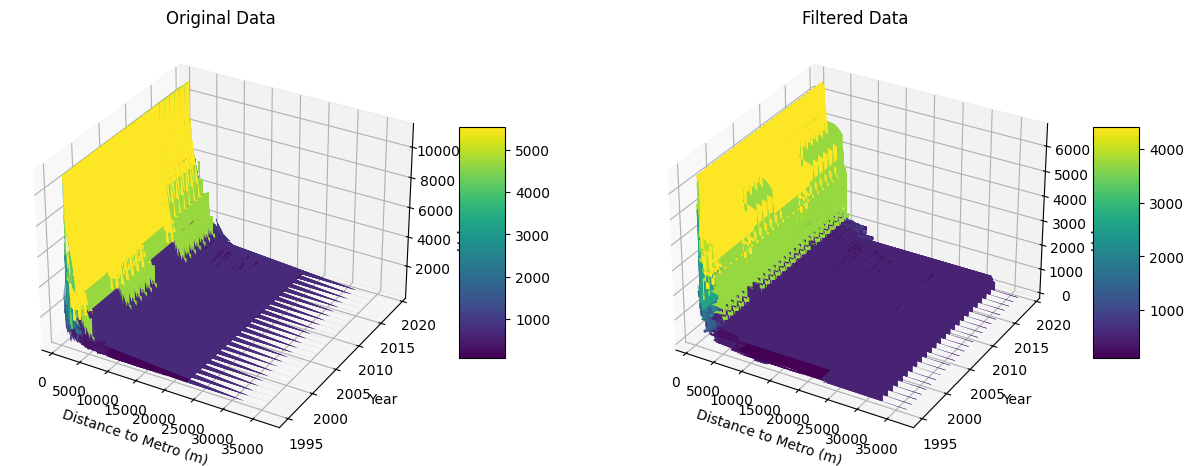

In [69]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Creating synthetic data
# np.random.seed(0)
x = np.array(final["dist_metro"])
y = np.array(
    final["ano"].astype(float)
)  # Ensure that 'ano' is treated as a numeric value
z = np.array(final["valor_m2_vpl"])

X, Y = np.meshgrid(x, y)
# Z = np.random.normal(5000, 1000, X.shape)  # synthetic values per square meter
# Z = np.column_stack([z, z])
Z = np.array([z] * 8393)


# Apply Savitzky-Golay filter for 2D data smoothing
window_size = 100  # window size must be odd
order = 4
Zf = signal.savgol_filter(Z, window_size, order, axis=0)
Zf = signal.savgol_filter(Zf, window_size, order, axis=1)

# Plotting
fig = plt.figure(figsize=(15, 6))

# Original Data Plot
ax1 = fig.add_subplot(121, projection="3d")
surf1 = ax1.plot_surface(X, Y, Z, cmap="viridis", edgecolor="none")
ax1.set_title("Original Data")
ax1.set_xlabel("Distance to Metro (m)")
ax1.set_ylabel("Year")
ax1.set_zlabel("Value per m²")
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)

# Filtered Data Plot
ax2 = fig.add_subplot(122, projection="3d")
surf2 = ax2.plot_surface(X, Y, Zf, cmap="viridis", edgecolor="none")
ax2.set_title("Filtered Data")
ax2.set_xlabel("Distance to Metro (m)")
ax2.set_ylabel("Year")
ax2.set_zlabel("Value per m²")
fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=5)

plt.show()

In [70]:
final.to_csv("reumo_final.csv")